<a href="https://colab.research.google.com/github/sunkusun9/ML2022_1/blob/main/pandas_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
pd.__version__

'1.3.5'

# Pandas  테이블 형태(Tabular)의 데이터 위한 툴

Pandas의 구성 요소

DataFrame, 행(row)와 열(column)으로 구성 된 자료 

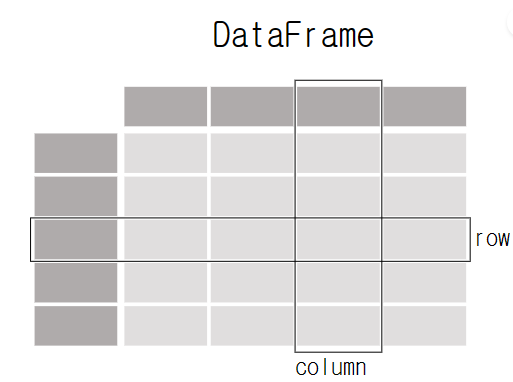

Series: DataFrame의 하나의 열 또는 행을 구성하는 요소

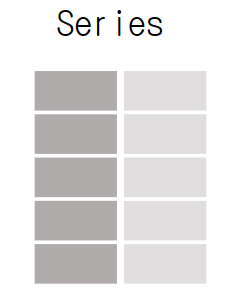

**Pandas는 numpy를 기반으로 구현 되어 서로 긴밀하게 연관되어 있다**

In [2]:
import numpy as np
np.__version__

'1.21.6'

# Pandas의 자료구조

[Intro to data structures](https://pandas.pydata.org/docs/user_guide/dsintro.html#dsintro) 을 기반으로 제작

## [Series](https://pandas.pydata.org/docs/reference/api/pandas.Series.html)

- 1차원의 색인화된 저장 구조
- 정수(integer), 실수(float), 문자(str), Python 객체(objects)를 다룰 수 있다.

s = pd.Series(data, index=index)

data - dict, ndarray, scalar

index - 색인, 값을 지정하지 않으면 0...(N-1)의 정수로 값이 지정

In [3]:
# 5개의 난수를 생성하여, Series를 생성 
s = pd.Series(np.random.randn(5))
s

0   -1.823076
1    0.365475
2   -1.743775
3    0.446659
4    0.221464
dtype: float64

In [4]:
# 5개의 난수를 생성하고, 인덱스를 'a'~'e'까지 지정
s = pd.Series(np.random.randn(5), index=["a", "b", "c", "d", "e"])
s

a    0.733732
b    0.699924
c    1.074581
d   -1.241842
e   -1.317294
dtype: float64

In [5]:
# 인덱스 확인
s.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [6]:
# dict 로 Series 생성, key는 index로, value는 Series의 value로 생성
d = {"a": 0.0, "b": 1.0, "c": 2.0}

pd.Series(d)

a    0.0
b    1.0
c    2.0
dtype: float64

In [7]:
# dict로 생성시 index를 사용하면 dict에 없는 데이터는 NA가 들어가고 index로 지정하지 않은 값은 제외된다.
# 즉 index를 기준으로 
pd.Series(d, index=['b', 'd', 'c'])

b    1.0
d    NaN
c    2.0
dtype: float64

In [8]:
# 단일 값으로 생성한다면, index를 제공하지 않으면, 길이가 1이고 인덱스가 0인 Series가 생성
pd.Series(5.0)

0    5.0
dtype: float64

In [9]:
# index를 제공한다면, 해당 값으로 index 만큼의 Series가 생성
pd.Series(5.0, index=['a', 'b', 'c', 'd'])

a    5.0
b    5.0
c    5.0
d    5.0
dtype: float64

In [10]:
# 값은 0~4 색인 은  'a'~'e'를 지는 Series 생성
s = pd.Series(np.arange(0, 5), index=[chr(ord('a') + i) for i in range(0, 5)])
s

a    0
b    1
c    2
d    3
e    4
dtype: int64

[Practice]

1. 0부터 2씩 증가하여 10까지 값을 지닌 Series 생성

2. 0부터 10까지 색인으로 하고 0부터 10까지 제곱수 지닌 Series를 생성

In [11]:
# 1
s = pd.Series(np.arange(0, 11, 2))
s

0     0
1     2
2     4
3     6
4     8
5    10
dtype: int64

In [12]:
# 2
s = pd.Series(np.arange(0, 5) ** 2, index=np.arange(0, 5))
s

0     0
1     1
2     4
3     9
4    16
dtype: int64

**Pandas Series는 벡터화 연산와 고차원변환(Broadcasting)을 지원한다.**

Series 와 Series 
- 색인 별로(색인이 같은 수 끼리) 연산이 이루어짐
- 색인이 일치 하지 않을 경우 NaN 값이 됨
- numpy array를 가지고 numpy 연산으로 처리하는 것보다 느리니, 보다 빠른 연산을 하려면, 인덱스 없이 numpy array와 함수로 처리할 것을 권장한다.

Series 와 Scalar(단일 변수)

numpy 함수와 Series 간 연산 => Series로 반환


* Series, Series간 벡터화 연산

In [13]:
s + s

0     0
1     2
2     8
3    18
4    32
dtype: int64

In [14]:
# 값에 대한 역순위 정렬을 한다.
s.sort_values(ascending=False)

4    16
3     9
2     4
1     1
0     0
dtype: int64

In [15]:
# 값의 순서로 이루진다고 착각할 수 있다, 같은 인덱스끼리 연산이 이루어 진다 이 점을 유의 하자.
s + s.sort_values(ascending=False)

0     0
1     2
2     8
3    18
4    32
dtype: int64

In [16]:
# index 매칭
s[:-1] + s[1:]

0     NaN
1     2.0
2     8.0
3    18.0
4     NaN
dtype: float64

In [17]:
# numpy 함수를 이용한 연산도 pandas 동일, numpy ndarray가 아닌 pandas Series를 넘긴다.
np.add(s[:-1], s[1:])

0     NaN
1     2.0
2     8.0
3    18.0
4     NaN
dtype: float64

* Series 와 scalar 간의 고차원변환(Broadcating) 연산

In [18]:
s + 3

0     3
1     4
2     7
3    12
4    19
dtype: int64

* numpy array와 비교한다면?

In [19]:
a = np.arange(1, 1000)
b = np.arange(1, 1000)

In [20]:
%%timeit
a + b

1.04 µs ± 11.3 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [21]:
a = pd.Series(np.arange(1, 1000))
b = pd.Series(np.arange(1, 1000))

In [22]:
%%timeit
a + b

118 µs ± 10.6 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [23]:
%%timeit
np.add(a, b)

143 µs ± 11.7 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


* 많이 느리다. 동일한 인덱스로 연산을 한다면, 
많은 연산을 직접할 때에는 numpy를 사용하는 것이 효율적일 수 있다.

In [24]:
%%timeit
a.values + b.values

3.24 µs ± 57 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Series에 이름을  부여할 수있다.

In [25]:
s.name = '1~5' # Series에 이름을  지정
s.name

'1~5'

In [26]:
# rename은 rename한 Series를 만들어 반환한다.
s.rename('1 부터 5')
s.name # 이름이 바뀌지 않음을 확인

'1~5'

이러한 함수 구성은 Method Chaining에 활용할 수 있다.

**Method Chaining: 객체에 연산 수행 후에 객체를 반환하고 이에 대한 함수 호출을 연속적으로 이어갈 수 있게하여 구현의 편의성과 가독성을 제공하는 기법**

In [27]:
s2 = s.rename('1 부터 5')
s2.name

'1 부터 5'

## [DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)

- **행(row)**과 **열(column)**로 구성된 2차원의 색인화된 저장 구조

In [28]:
# dict를 통한 생성
# dict의 key는 열의 이름이 된다.
df = pd.DataFrame({
    "one": [1, 11, 21, 31, 41],
    "two": np.array([2, 12, 22, 32, 42]), # ndarray로 생성이 가능
    "three": range(3, 44, 10), # iterable로도 가능,
    'four': pd.Series(np.arange(4, 45, 10), index=[0, 10, 20, 30, 41]) # Series로도 가능하다. DataFrame에서 지정한 index만을 가져온다
}, index=[0, 10, 20, 30,40])
df

,one,two,three,four
0,1,2,3,4.0
10,11,12,13,14.0
20,21,22,23,24.0
30,31,32,33,34.0
40,41,42,43,NaN


In [29]:
df = pd.DataFrame({
    "one": [1, 11, 21, 31, 41],
    "two": np.array([2, 12, 22, 32, 42]),
    "three": pd.Series(np.arange(3, 45, 10)),
    'four': pd.Series(np.arange(4, 45, 10))
}, index=[0, 10, 20, 30, 41])
df

,one,two,three,four
0,1,2,3.0,4.0
10,11,12,NaN,NaN
20,21,22,NaN,NaN
30,31,32,NaN,NaN
41,41,42,NaN,NaN


In [30]:
# 2차원 리스트
df = pd.DataFrame([
    [1, 2, 3],
    [11, 12, 13],
    [21, 22, 23],
    [31, 32, 33],
    [41, 42, 43],
], index=[0, 10, 20, 30,40], columns=["one", "two", "three"])
df

,one,two,three
0,1,2,3
10,11,12,13
20,21,22,23
30,31,32,33
40,41,42,43


In [31]:
# 2차원 ndarray
df = pd.DataFrame(np.array([
    [1, 2, 3],
    [11, 12, 13],
    [21, 22, 23],
    [31, 32, 33],
    [41, 42, 43],
]), index=[0, 10, 20, 30, 40], columns=["one", "two", "three"])
df

,one,two,three
0,1,2,3
10,11,12,13
20,21,22,23
30,31,32,33
40,41,42,43


In [32]:
# 하나의 열은 Series
df['one'], type(df['one']) # DataFrame의 index를 가져간다

(0      1
 10    11
 20    21
 30    31
 40    41
 Name: one, dtype: int64, pandas.core.series.Series)

In [33]:
# 하나의 행은 Series
df.loc[10], type(df.loc[10]) # Columns 명이 index가 된다

(one      11
 two      12
 three    13
 Name: 10, dtype: int64, pandas.core.series.Series)

열 선택, 추가, 삭제

In [34]:
df = pd.DataFrame(np.array([
    [1, 2, 3],
    [11, 12, 13],
    [21, 22, 23],
    [31, 32, 33],
    [41, 42, 43],
]), index=[0, 10, 20, 30, 40], columns=["one", "two", "three"])
df

,one,two,three
0,1,2,3
10,11,12,13
20,21,22,23
30,31,32,33
40,41,42,43


In [35]:
df["four"] = df["one"] + 1 # = 를 통해 직접 생성
df

,one,two,three,four
0,1,2,3,2
10,11,12,13,12
20,21,22,23,22
30,31,32,33,32
40,41,42,43,42


In [36]:
df["four"] = df["one"][:2] + 1 # 역시 인덱스를 매칭한다. 매칭되지 않는 것은 NaN으로 채워진다.
df

,one,two,three,four
0,1,2,3,2.0
10,11,12,13,12.0
20,21,22,23,NaN
30,31,32,33,NaN
40,41,42,43,NaN


* Pandas Series는 Index를 체크하지만, 그 외(scalar, list, numpy array, ...)는 단일 변수는 일괄 설정, list, array는 행의 수가 동일할 때 위치에 대응이 되어 입력이 된다.

In [43]:
df["five"] = 5 # 단일 변수는 모든 행이 동일하게 추가.
df

,one,two,three,four,five
0,1,2,3,2.0,5
10,11,12,13,12.0,5
20,21,22,23,NaN,5
30,31,32,33,NaN,5
40,41,42,43,NaN,5


In [41]:
df["five"] = np.arange(0, 5) * 10 # numpy array는 순차적으로 추가된다.
df

,one,two,three,four,five
0,1,2,3,2.0,0
10,11,12,13,12.0,10
20,21,22,23,NaN,20
30,31,32,33,NaN,30
40,41,42,43,NaN,40


In [42]:
df["six"] = np.arange(0, 4) * 10 # numpy array는 행의 수가 같아야 한다. 아니면 에러

ValueError: ignored

assign은 열이 추가된 열을 반환하다. 이 때 데이터는 **복사**가 된다. 메소드 연결 호출에 유용하다.

In [44]:
df.assign(five=lambda x: x['three'] + 1) # three열에 1을 더해 five을 만든다.

,one,two,three,four,five
0,1,2,3,2.0,4
10,11,12,13,12.0,14
20,21,22,23,NaN,24
30,31,32,33,NaN,34
40,41,42,43,NaN,44


In [45]:
del df['four'] # del을 통해 삭제
df

,one,two,three,five
0,1,2,3,5
10,11,12,13,5
20,21,22,23,5
30,31,32,33,5
40,41,42,43,5


**Pandas DataFrame의 연산 또한 벡터화 연산와 고차원변환(Broadcasting)을 지원한다.**

DataFrame 과 DataFrame

DataFrame 와 Series

- 색인 별로(색인이 같은 수 끼리) 연산이 이루어짐
- 색인이 일치 하지 않을 경우 NaN 값이 됨
- numpy array를 가지고 numpy 연산으로 처리하는 것보다 느리니, 보다 빠른 연산을 하려면, 인덱스 없이 numpy array와 함수로 처리할 것을 권장한다.

numpy 함수와 DataFrame 간 연산 => DataFrame으로 반환

In [46]:
df_A = pd.DataFrame(np.array([
    [1, 2, 3],
    [11, 12, 13],
    [21, 22, 23],
    [31, 32, 33],
    [41, 42, 43],
]), index=[0, 10, 20, 30, 40], columns=["one", "two", "three"])

df_B = pd.DataFrame(np.array([
    [3, 2, 1],
    [13, 12, 11],
    [23, 22, 21],
    [33, 32, 31],
    [53, 52, 51],
]), index=[0, 10, 20, 30, 50], columns=["one", "two", "four"])

df_A + df_B # 매칭하는 columns과 index가 없을 경우 NaN이 된다.

,four,one,three,two
0,NaN,4.0,NaN,4.0
10,NaN,24.0,NaN,24.0
20,NaN,44.0,NaN,44.0
30,NaN,64.0,NaN,64.0
40,NaN,NaN,NaN,NaN
50,NaN,NaN,NaN,NaN


In [47]:
df_A = pd.DataFrame(np.array([
    [1, 2, 3],
    [11, 12, 13],
    [21, 22, 23],
    [31, 32, 33],
    [41, 42, 43],
]), index=[0, 10, 20, 30, 40], columns=["one", "two", "three"])

df_A * 5 # DataFrame 과 Scalar  

,one,two,three
0,5,10,15
10,55,60,65
20,105,110,115
30,155,160,165
40,205,210,215


In [48]:
s_A = pd.Series([5, 4, 3], index=["one", "two", "three"])
df_A * s_A # 행에 대한 고차원변환이 된다.

,one,two,three
0,5,8,9
10,55,48,39
20,105,88,69
30,155,128,99
40,205,168,129


In [49]:
s_A = pd.Series([5, 4, 3, 2, 1], index=[50, 10, 20, 30, 40])
df_A * s_A # 연산자로는 지원하지 않는다.

,10,20,30,40,50,one,three,two
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
s_A = pd.Series([5, 4, 3, 2, 1], index=[50, 10, 20, 30, 40])
df_A.multiply(s_A, axis=0)# 연산자로는 지원하지 않는다. 연산을 수행할 축을 지정하여 처리한다.

,one,two,three
0,NaN,NaN,NaN
10,44.0,48.0,52.0
20,63.0,66.0,69.0
30,62.0,64.0,66.0
40,41.0,42.0,43.0
50,NaN,NaN,NaN


In [51]:
# Series와  마찬가지로 numpy와 호완되며 DataFrame을 반환한다.
s_A = pd.Series([5, 4, 3], index=["one", "two", "three"])
np.add(df_A, s_A)

,one,two,three
0,6,6,6
10,16,16,16
20,26,26,26
30,36,36,36
40,46,46,46


In [52]:
%%timeit

df_A = pd.DataFrame(np.array([
    [1, 2, 3],
    [11, 12, 13],
    [21, 22, 23],
    [31, 32, 33],
    [41, 42, 43],
]), index=[0, 10, 20, 30, 40], columns=["one", "two", "three"])


df_B = pd.DataFrame(np.array([
    [3, 2, 1],
    [13, 12, 11],
    [23, 22, 21],
    [33, 32, 31],
    [53, 52, 51],
]), index=[0, 10, 20, 30, 40], columns=["one", "two", "three"])

df_A * df_B

758 µs ± 72.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [53]:
%%timeit

df_A.values * df_B.values

8.45 µs ± 935 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


동일한 형태의 DataFrame이라면 numpy를 통한 연산이 훨씬 빠르다.

# 참고

## 벡터화 연산(Vectorized operations)



**벡터화 연산(Vectorized operation) 이란?**

array의 단위(1차원, 2차원, ... n차원)의 연산을 할 때, 한 번에 많은 양의 수를 연산하여 연산 효율을 높인다. 이와 함께 구현을 간단하게 할 수 있다. > 이를 최대한 잘 활용해야, **개발/연산 시간**과 **에너지**를 아낄 수 있다.

ex) 0 ~ 1000 까지의 수열과,
1000 ~ 0 까지의 수열 각각을 더해보자.

In [54]:
a = [i for i in range(0, 1001)]
b = [i for i in range(1000, -1, -1)]

In [55]:
# list에서 a + b 는 두 리스트가 값이 더 해져서 나오는 것이 아니라, 요소들이 합쳐진다.
# 즉, 벡터화 연산을 지원하지 않는다.
c = a + b
# 확인하기 위해 c는 길이가 길어 처음 5개 끝 5개와 길이를 보자
c[:5], c[-5:], len(c)

([0, 1, 2, 3, 4], [4, 3, 2, 1, 0], 2002)

In [56]:
# 이 둘을 더 하려면, 요소별로 덧셈을 해주어야 한다.

c = []
for i, j in zip(a, b):
    c.append(i + j)

#처음 5개와 길이만 보자
c[:5], len(c)

([1000, 1000, 1000, 1000, 1000], 1001)

In [57]:
# Numpy ndarray는 벡터화 연산을 지원한다.
np_a = np.array(a)
np_b = np.array(b)

# 각각의 array 인덱스에 대응하여 덧셈이 이루어 진다
np_c = np_a + np_b

np_c[:5], len(np_c)

(array([1000, 1000, 1000, 1000, 1000]), 1001)

numpy ndarray는 벡터화 연산을 통해 수행 속도를 줄일 수 있다.

동일한 numpy ndarray를 이용하여 벡터를 이용했을 때와

단일 연산의 반복으로 처리했을 때를 비교해보자.

In [58]:
# 동일한 numpy ndarray를 이용하여 벡터
%%timeit

np_c = np_a + np_b

1.1 µs ± 10.9 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [59]:
# 단일 연산의 반복으로 처리했을 때
%%timeit

np_c_v = np.zeros(len(np_a))
for i, (a, b) in enumerate(zip(np_a, np_b)):
    np_c_v[i] = a + b

431 µs ± 11.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [60]:
# a의 합을 구해보자
%%timeit

s_a = 0
for a in np_a:
    s_a += a

124 µs ± 5.13 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [61]:
%%timeit

s_a = np.sum(np_a)

5.21 µs ± 194 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


[Practice]

np_c와 np_c_v가 같은지 확인

In [62]:
np_c = np_a + np_b

np_c_v = np.zeros_like(np_a) # np_a와 동일한 형태로 모두 0으로 된 ndarray 생성
for i, (a, b) in enumerate(zip(np_a, np_b)):
    np_c_v[i] = a + b

np.sum(np_c == np_c_v) == len(np_c)

True

a = np.array([1, 2, 3, 4, 5])
b = np.array([5, 4, 3, 2, 1]) 일 때, 다음을 구하라

$s=\sum\limits_{i=1}^{n}a_ib_i$

In [63]:
a = np.array([1, 2, 3, 4, 5])
b = np.array([5, 4, 3, 2, 1])
np.sum(a * b)

35

In [64]:
np.dot(a, b)

35

In [65]:
%%timeit
np.sum(a * b) # a * b => np.sum 2번

5.27 µs ± 807 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [66]:
%%timeit
np.dot(a, b) # np.dot => 1번

1.32 µs ± 61 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


## 고차원변환(Broadcasting) 연산

서로 다른 차원의 배열의 연산에서, 낮은 차원의 배열이 높은 차원의 배열로 차원 변환(Casting)되어 연산을 하는 것

numpy는 고차원변환(broadcasting)을 지원한다. [Numpy Broadcating](https://numpy.org/doc/stable/user/basics.broadcasting.html)

In [67]:
s = np.array([1, 2, 3, 4, 5])
s * 3 # s는 1차원이고 3은 단일 변수(scalar)이다. 단일 변수(scalar)가 s의 차원과 형태(shape, (5, ))에 맞춰 변환되여 * 연산을 수행한다.

array([ 3,  6,  9, 12, 15])

In [68]:
# broadcating이 지원 안 된다면, 다음과 같이 연산을 수행해야 한다.
s1 = np.array([1, 2, 3, 4, 5])
s2 = np.array([3, 3, 3, 3, 3])

s1 * s2

array([ 3,  6,  9, 12, 15])

이러한 점에서 고차원변환(Broadcasting)은 연산에 엄청난 편리성을 제공

In [69]:
# 2차원 배열과 1차원 배열
a = np.arange(1, 21).reshape((4, 5))
a

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20]])

In [70]:
b = np.arange(1, 6)
b

array([1, 2, 3, 4, 5])

In [71]:
a / b # a와 같은 row수로 [1, 2, 3, 4 ,5] 반복적으로 확장이 되어  연산이 된다

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 6.        ,  3.5       ,  2.66666667,  2.25      ,  2.        ],
       [11.        ,  6.        ,  4.33333333,  3.5       ,  3.        ],
       [16.        ,  8.5       ,  6.        ,  4.75      ,  4.        ]])

In [72]:
# 고차원확장이 없다면, 다음과 같이 연산을 진행
c = a.copy().astype(np.float32)
for i in range(a.shape[0]):
    c[i] = c[i] /  b
c

array([[ 1.       ,  1.       ,  1.       ,  1.       ,  1.       ],
       [ 6.       ,  3.5      ,  2.6666667,  2.25     ,  2.       ],
       [11.       ,  6.       ,  4.3333335,  3.5      ,  3.       ],
       [16.       ,  8.5      ,  6.       ,  4.75     ,  4.       ]],
      dtype=float32)

In [73]:
b = np.arange(1, 5)
a / b # 낮은 차원일 때는, 열(마지막 차원) 수와 일치해야한다.

ValueError: ignored

In [74]:
b = np.arange(1, 5) # 열에 대한 직접적인 고차원 변환은 지원하지 않지만,
a / b[:, np.newaxis] # 동일한 차원이고, 형태가 1인 것만 제외하고 나머지는 같다면, 형태가 1인 차원에 대해서 반복을 통해 형태를 맞추어 연산이 된다.

array([[1.        , 2.        , 3.        , 4.        , 5.        ],
       [3.        , 3.5       , 4.        , 4.5       , 5.        ],
       [3.66666667, 4.        , 4.33333333, 4.66666667, 5.        ],
       [4.        , 4.25      , 4.5       , 4.75      , 5.        ]])

In [75]:
b[:, np.newaxis ], b[:, np.newaxis ].shape # 즉 열에 대한 형태가 반복을 통해 맞추어져서 열단위 고차원 변환과 같은 효과를 낸 것이다.

(array([[1],
        [2],
        [3],
        [4]]), (4, 1))

In [76]:
# 위의 연산은 다음과 같다.
c = a.copy().astype(np.float32)
for i in range(a.shape[1]):
    c[:, i] = c[:, i] /  b
c

array([[1.       , 2.       , 3.       , 4.       , 5.       ],
       [3.       , 3.5      , 4.       , 4.5      , 5.       ],
       [3.6666667, 4.       , 4.3333335, 4.6666665, 5.       ],
       [4.       , 4.25     , 4.5      , 4.75     , 5.       ]],
      dtype=float32)

고차원변환과 벡터화까지 적용되어 있다면, 
numpy에서는 연산속도에 향상이 있다.

In [77]:
s1 = np.arange(1, 10001).astype(np.float32).reshape(100, 100)
s2 = np.arange(1, 101)

In [78]:
%%timeit
s1 / s2

23.7 µs ± 428 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [79]:
%%timeit
for i in range(100):
    s1[i] /= s2

285 µs ± 12.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
